#FAST AI FOR THE FINAL CLAHE15+SHARP Dataset and Dataset C with no preprocessing

In [ ]:
!nvidia-smi

Sun Jan 16 15:00:22 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

KeyboardInterrupt: ignored

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:38<00:00, 69.6MB/s]
100% 2.29G/2.29G [00:38<00:00, 63.6MB/s]


In [ ]:
#!unzip "/content/drive/MyDrive/Output.zip"
!unzip "/content/drive/MyDrive/5classpreprocessed.zip"

Streaming output truncated to the last 5000 lines.
  inflating: 5classpreprocessed/PNEUMONIA/C15SHARP8489c930-19a8-4895-9211-4efd3d38ae58.png  
  inflating: 5classpreprocessed/PNEUMONIA/C15SHARP848a75c0-f225-406c-ace5-4c8589cc2368.png  
  inflating: 5classpreprocessed/PNEUMONIA/C15SHARP84909dca-4b86-43dd-8bba-d8fc06a85e15.png  
  inflating: 5classpreprocessed/PNEUMONIA/C15SHARP849217ad-5cb2-4a87-9796-420b69722b14.png  
  inflating: 5classpreprocessed/PNEUMONIA/C15SHARP84a14ff5-f4fe-4ee4-9873-ccb84b76d5a8.png  
  inflating: 5classpreprocessed/PNEUMONIA/C15SHARP84b0f6d4-30e5-4124-8d7d-5f747e2368bf.png  
  inflating: 5classpreprocessed/PNEUMONIA/C15SHARP84c7222e-0f68-4de6-9f85-9e3fd1089f79.png  
  inflating: 5classpreprocessed/PNEUMONIA/C15SHARP84d73e68-ceb9-4bff-94d9-9b97523109ee.png  
  inflating: 5classpreprocessed/PNEUMONIA/C15SHARP84fb9389-5b59-4db4-811c-7345c8bcd579.png  
  inflating: 5classpreprocessed/PNEUMONIA/C15SHARP8502b7bb-f681-47a1-aa45-06f6b692841a.png  
  inflating: 5class

In [ ]:
!pip install split-folders tqdm
import splitfolders  # or import split_folders
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.

splitfolders.ratio("/content/5classpreprocessed", output="Output", seed=1337, ratio=(.6,.3,.1), group_prefix=None) # default values
# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
#splitfolders.fixed("/content/susmitadipluskaggle", output="Output", seed=1337, fixed=(70,70), oversample=False, group_prefix=None) # default values

Copying files: 32687 files [01:21, 400.31 files/s]


In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import fastai

In [ ]:
fastai.__version__

'1.0.61'

In [ ]:
import warnings
warnings.filterwarnings('ignore')
  
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path=Path("/content/Output")

In [ ]:
data = ImageDataBunch.from_folder(path, train='train', valid='val', ds_tfms=get_transforms(do_flip=False), size=224, bs=64, num_workers=8)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  re

In [ ]:
data.show_batch()
# See the classes and count of classes in your dataset
print(data.classes,data.c)
print(len(data.train_ds), len(data.valid_ds))

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics = accuracy)

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [ ]:
def convert_act_cls(model, layer_type_old, layer_type_new):
    conversion_count = 0
    for name, module in reversed(model._modules.items()):
        if len(list(module.children())) > 0:
            # recurse
            model._modules[name] = convert_act_cls(module, layer_type_old, layer_type_new)

        if type(module) == layer_type_old:
            layer_old = module
            layer_new = layer_type_new
            model._modules[name] = layer_new

    return model
learn.model = convert_act_cls(learn.model, nn.softmax, sigmoid())

In [ ]:
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy,time
0,0.833212,0.501265,0.839555,06:01
1,0.619316,0.418957,0.848939,05:53
2,0.477261,0.334755,0.878825,05:53
3,0.387047,0.284995,0.898001,05:53
4,0.323358,0.275101,0.905141,05:53
5,0.291922,0.318317,0.891779,05:53
6,0.251379,0.256379,0.912077,05:53
7,0.234991,0.244027,0.921053,05:52
8,0.219640,0.217328,0.924113,05:52
9,0.190226,0.219276,0.925847,05:52


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
#data_path=Path('./chest_xray').absolute()
model_path=Path('/content/drive/MyDrive/5classpreprocessedmodelfastai/').absolute()

In [ ]:
learn.export(model_path / 'export.pkl')
learn.save(model_path / 'export')

In [ ]:
# Save the model
learn.save('stage-1')

# Load the Model
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (19611 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
COVID,COVID,COVID,COVID,COVID
Path: /content/Output;

Valid: LabelList (9804 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
COVID,COVID,COVID,COVID,COVID
Path: /content/Output;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_s

In [ ]:
# Build a Classification Interpretation object from our learn model
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


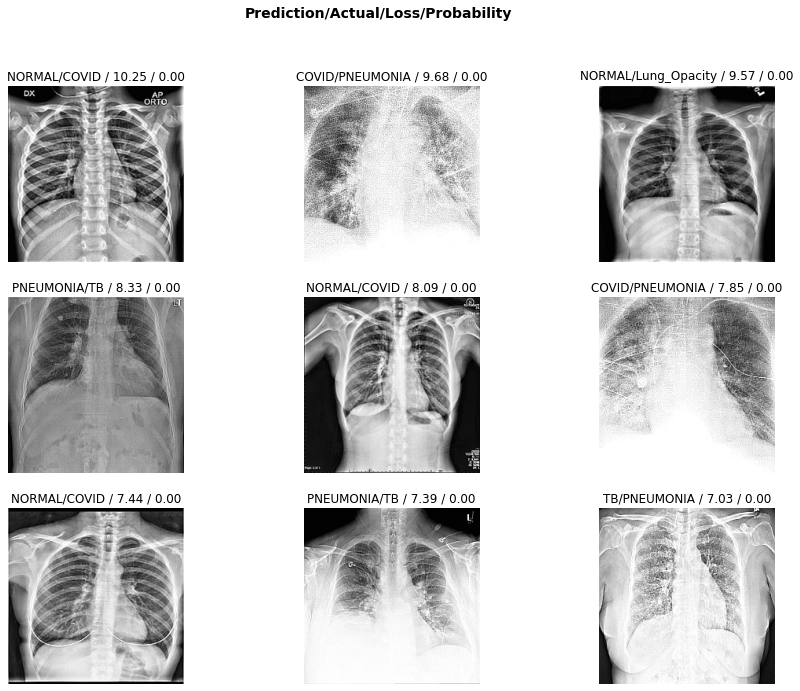

In [ ]:
# Show top 9 images with the highest loss
interp.plot_top_losses(9, figsize=(15,11))

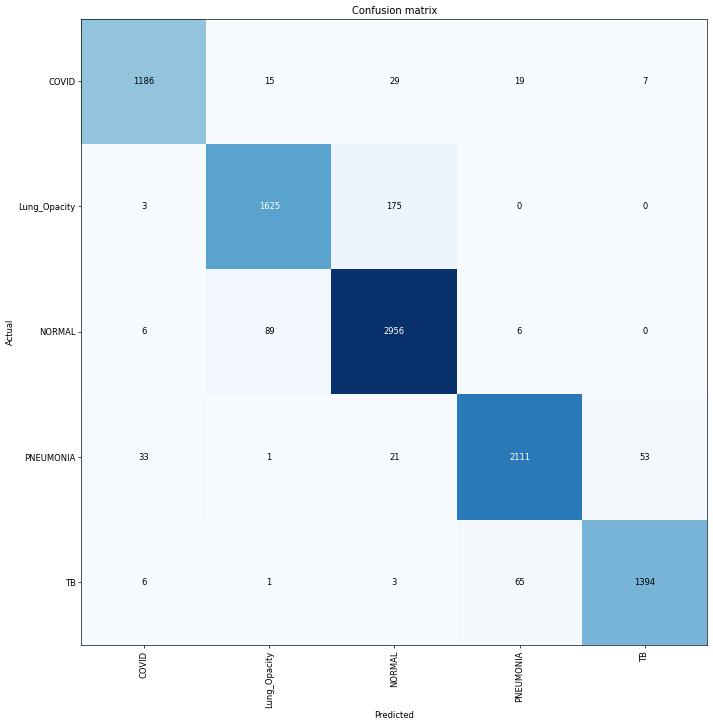

In [ ]:
# Build a confusion matrix
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
# Build a text version of a confusion matrix-- really helpful with a lot of classes
interp.most_confused(min_val=2)

[('Lung_Opacity', 'NORMAL', 175),
 ('NORMAL', 'Lung_Opacity', 89),
 ('TB', 'PNEUMONIA', 65),
 ('PNEUMONIA', 'TB', 53),
 ('PNEUMONIA', 'COVID', 33),
 ('COVID', 'NORMAL', 29),
 ('PNEUMONIA', 'NORMAL', 21),
 ('COVID', 'PNEUMONIA', 19),
 ('COVID', 'Lung_Opacity', 15),
 ('COVID', 'TB', 7),
 ('NORMAL', 'COVID', 6),
 ('NORMAL', 'PNEUMONIA', 6),
 ('TB', 'COVID', 6),
 ('Lung_Opacity', 'COVID', 3),
 ('TB', 'NORMAL', 3)]

epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 7.59E-08


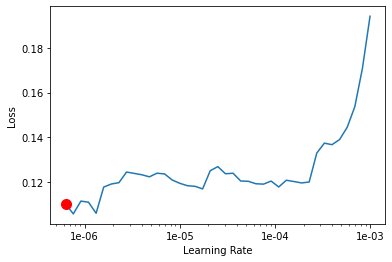

In [ ]:
learn.unfreeze()

# Find the optimal learning rate and plot a visual
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
# Fit the model over 2 epochs
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.272112,0.323922,0.877805,07:40
1,0.145754,0.150264,0.947368,07:42


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 1.10E-07


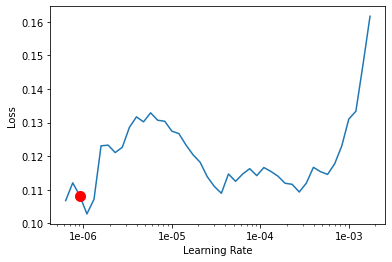

In [ ]:
# See if optimal learning rate changes
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
# Fit the model 2 more epochs over all the layers
learn.fit_one_cycle(1, max_lr=slice(6e-07,1e-06))

epoch,train_loss,valid_loss,accuracy,time
0,0.112132,0.135732,0.954304,07:43


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
# Save the model
learn.save('stage-2')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


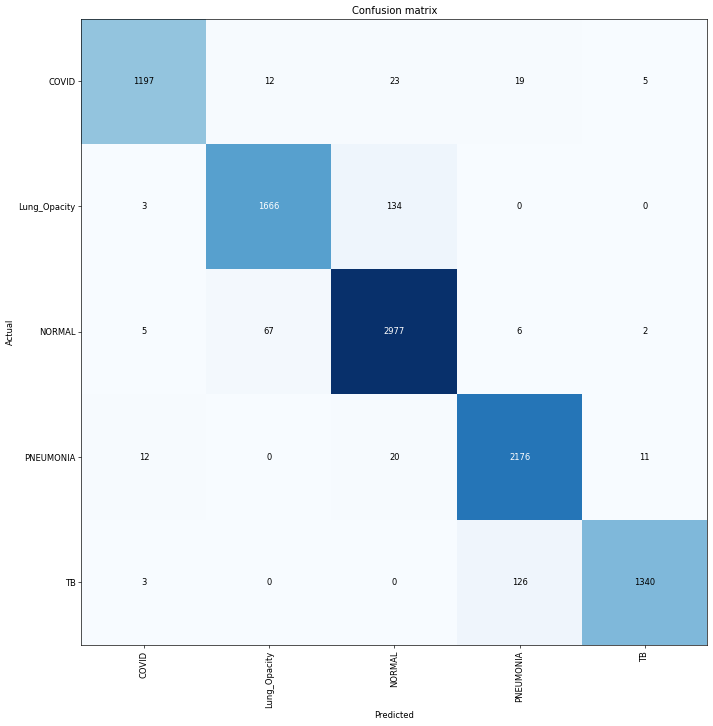

In [ ]:
# Rebuild interpreter and replot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
# Save final stage of model
learn.save('stage-2')

In [ ]:
# Show top 9 images with the highest loss
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
# Build a text version of a confusion matrix-- really helpful with a lot of classes
interp.most_confused(min_val=2)

In [ ]:
model_path=Path("/content/drive/MyDrive/covidnet2").absolute()
print(model_path)
learn.export(model_path / 'export.pkl')
learn.save(model_path / 'pneumonia')

/content/drive/MyDrive/covidnet2


In [ ]:
import fastai; fastai.__version__
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [ ]:
from fastai.callbacks.hooks import *

In [ ]:
#learn=load_learner("..")
learn=load_learner("/content/drive/MyDrive/5classpreprocessedmodelfastai")
model=learn.model.eval()

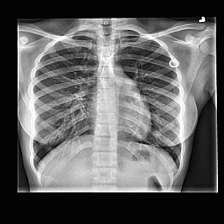

In [ ]:
#img=open_image("/content/C15SHARPCHNCXR_0574_1.png")
img=open_image("/content/C15SHARPNormal-1.png")
img.resize(224)

In [ ]:
pred=learn.predict(img)
cls=int(pred[1])
print(pred,cls)
print("Result: ")
if(cls==0):
  print("COVID-19")
elif(cls==1):
  print("Lung Opacity")
elif(cls==2):
  print("Normal")
elif(cls==3):
  print("Pneumonia")
else:
  print("Tuberculosis")
print(max(pred[2]*100))

(Category tensor(2), tensor(2), tensor([1.5430e-06, 7.8414e-04, 9.9921e-01, 2.7458e-08, 2.7390e-09])) 2
Result: 
Normal
tensor(99.9214)


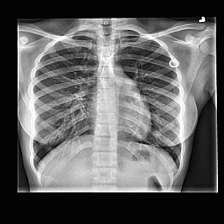

In [ ]:
b, _ =learn.data.one_item(img,denorm=False)
#b = Image(data.one_item(img,denorm=True))
#b=b.cuda()
img

In [ ]:
with hook_output(model[0]) as hook_a:
  with hook_output(model[0],grad=True) as hook_g:
    preds=model(b)
    preds[0,cls].backward()
acts=hook_a.stored[0].cpu()
grad=hook_g.stored[0][0].cpu()

In [ ]:
grad_chan=grad.mean(1).mean(1)
mult=((acts*grad_chan[..., None, None])).sum(0)

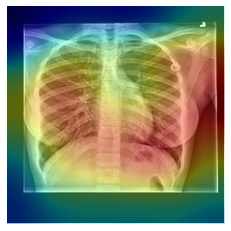

In [ ]:
_, ax=plt.subplots()
img.show(ax)
ax.imshow(mult, alpha=0.4, extent=(0,224,224,0), interpolation='bicubic', cmap='jet')

In [ ]:
#Bounding Box on GradCam

#Bounding Box On GradCam 
##https://github.com/zalkikar/BBOX_GradCAM

In [ ]:
import cv2
try:
    import google.colab
    from google.colab.patches import cv2_imshow
except:
    from cv2 import imshow as cv2_imshow
import matplotlib.pyplot as plt
import os
import numpy as np

class BBoxerwGradCAM():
    
    def __init__(self,learner,heatmap,image_path,resize_scale_list,bbox_scale_list):
        self.learner = learner
        self.heatmap = heatmap
        self.image_path = image_path
        self.resize_list = resize_scale_list
        self.scale_list = bbox_scale_list
        
        self.og_img, self.smooth_heatmap = self.heatmap_smoothing()
        
        self.bbox_coords, self.poly_coords, self.grey_img, self.contours = self.form_bboxes()
        
    def heatmap_smoothing(self):
        og_img = cv2.imread(self.image_path)
        heatmap = cv2.resize(self.heatmap, (self.resize_list[0],self.resize_list[1])) # Resizing
        og_img = cv2.resize(og_img, (self.resize_list[0],self.resize_list[1])) # Resizing
        '''
        The minimum pixel value will be mapped to the minimum output value (alpha - 0)
        The maximum pixel value will be mapped to the maximum output value (beta - 155)
        Linear scaling is applied to everything in between.
        These values were chosen with trial and error using COLORMAP_JET to deliver the best pixel saturation for forming contours.
        '''
        heatmapshow = cv2.normalize(heatmap, None, alpha=0, beta=155, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        heatmapshow = cv2.applyColorMap(heatmapshow, cv2.COLORMAP_JET)
        
        return og_img, heatmapshow
    
    def show_smoothheatmap(self):
        cv2_imshow(self.smooth_heatmap)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
    def show_bboxrectangle(self):
        cv2.rectangle(self.og_img,
                      (self.bbox_coords[0],self.bbox_coords[1]),
                      (self.bbox_coords[0]+self.bbox_coords[2],self.bbox_coords[1]+self.bbox_coords[3]),
                      (0,0,0),3)
        cv2_imshow(self.og_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    def show_contouredheatmap(self):
        img_col = cv2.merge([self.grey_img,self.grey_img,self.grey_img]) # merge channels to create color image (3 channels)
        cv2.fillPoly(img_col, self.contours, [36,255,12]) # fill contours on 3 channel image
        cv2_imshow(img_col)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
    def show_bboxpolygon(self):
        cv2.polylines(self.og_img,self.poly_coords,True,(0,0,0),2)
        cv2_imshow(self.og_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    def form_bboxes(self):
        grey_img = cv2.cvtColor(self.smooth_heatmap, cv2.COLOR_BGR2GRAY)
        ret,thresh = cv2.threshold(grey_img,200,255,cv2.THRESH_BINARY)
        contours,hierarchy = cv2.findContours(thresh, 1, 2)

        for item in range(len(contours)):
            cnt = contours[item]
            if len(cnt)>20:
                #print(len(cnt))
                x,y,w,h = cv2.boundingRect(cnt) # x, y is the top left corner, and w, h are the width and height respectively
                poly_coords = [cnt] # polygon coordinates are based on contours
                
                x = int(x*self.scale_list[0]) # rescaling the boundary box based on user input
                y = int(y*self.scale_list[1])
                w = int(w*self.scale_list[2])
                h = int(h*self.scale_list[3])

                return [x,y,w,h], poly_coords, grey_img, contours
            
            else: print("contour error (too small)")
                
    def get_bboxes(self):
        return self.bbox_coords, self.poly_coords

In [ ]:
import scipy.ndimage
#@title GradCAM Class

class GradCam():
    @classmethod
    def from_interp(cls,learn,interp,img_idx,ds_type=DatasetType.Valid,include_label=False):
        # produce heatmap and xb_grad for pred label (and actual label if include_label is True)
        if ds_type == DatasetType.Valid:
            ds = interp.data.valid_ds
        elif ds_type == DatasetType.Test:
            ds = interp.data.test_ds
            include_label=False
        else:
            return None
        
        x_img = ds.x[img_idx]
        xb,_ = interp.data.one_item(x_img)
        #xb_img = Image(interp.data.denorm(xb)[0])
        probs = interp.preds[img_idx].numpy()

        pred_idx = interp.pred_class[img_idx].item() # get class idx of img prediction label
        hmap_pred,xb_grad_pred = get_grad_heatmap(learn,xb,pred_idx,size=xb_img.shape[-1])
        prob_pred = probs[pred_idx]
        
        actual_args=None
        if include_label:
            actual_idx = ds.y.items[img_idx] # get class idx of img actual label
            if actual_idx!=pred_idx:
                hmap_actual,xb_grad_actual = get_grad_heatmap(learn,xb,actual_idx,size=xb_img.shape[-1])
                prob_actual = probs[actual_idx]
                actual_args=[interp.data.classes[actual_idx],prob_actual,hmap_actual,xb_grad_actual]
        
        return cls(x_img,interp.data.classes[pred_idx],prob_pred,hmap_pred,xb_grad_pred,actual_args)
    
    @classmethod
    def from_one_img(cls,learn,x_img,label1=None,label2=None):
        '''
        learn: fastai's Learner
        x_img: fastai.vision.image.Image
        label1: generate heatmap according to this label. If None, this wil be the label with highest probability from the model
        label2: generate additional heatmap according to this label
        '''
        pred_class,pred_idx,probs = learn.predict(x_img)
        label1= str(pred_class) if not label1 else label1
        
        xb,_ = learn.data.one_item(x_img)
        #xb_img = Image(learn.data.denorm(xb)[0])
        probs = probs.numpy()
        
        label1_idx = learn.data.classes.index(label1)
        hmap1,xb_grad1 = get_grad_heatmap(learn,xb,label1_idx,size=x_img.shape[-1])
        prob1 = probs[label1_idx]
        
        label2_args = None
        if label2:
            label2_idx = learn.data.classes.index(label2)
            hmap2,xb_grad2 = get_grad_heatmap(learn,xb,label2_idx,size=xb_img.shape[-1])
            prob2 = probs[label2_idx]
            label2_args = [label2,prob2,hmap2,xb_grad2]
            
        return cls(x_img,label1,prob1,hmap1,xb_grad1,label2_args)
    
    def __init__(self,x_img,label1,prob1,hmap1,xb_grad1,label2_args=None):
        self.x_img=x_img
        self.label1,self.prob1,self.hmap1,self.xb_grad1 = label1,prob1,hmap1,xb_grad1
        if label2_args:
            self.label2,self.prob2,self.hmap2,self.xb_grad2 = label2_args
            
    def plot(self,plot_hm=True,plot_gbp=True):
        if not plot_hm and not plot_gbp:
            plot_hm=True
        cols = 5 if hasattr(self, 'label2') else 3
        if not plot_gbp or not plot_hm:
            cols-= 2 if hasattr(self, 'label2') else 1

        fig,row_axes = plt.subplots(1,cols,figsize=(cols*5,5))  
        col=0
        size=self.x_img.shape[-1]
        self.x_img.show(row_axes[col]);col+=1
        
        label1_title = f'1.{self.label1} {self.prob1:.3f}'
        if plot_hm:
            show_heatmap(self.hmap1,self.x_img,size,row_axes[col])
            row_axes[col].set_title(label1_title);col+=1
        if plot_gbp:
            row_axes[col].imshow(self.xb_grad1)
            row_axes[col].set_axis_off()
            row_axes[col].set_title(label1_title);col+=1
        
        if hasattr(self, 'label2'):
            label2_title = f'2.{self.label2} {self.prob2:.3f}'
            if plot_hm:
                show_heatmap(self.hmap2,self.x_img,size,row_axes[col])
                row_axes[col].set_title(label2_title);col+=1
            if plot_gbp:
                row_axes[col].imshow(self.xb_grad2)
                row_axes[col].set_axis_off()
                row_axes[col].set_title(label2_title)
        # plt.tight_layout()
        fig.subplots_adjust(wspace=0, hspace=0)
        # fig.savefig('data_draw/both/gradcam.png')

def minmax_norm(x):
    return (x - np.min(x))/(np.max(x) - np.min(x))
def scaleup(x,size):
    scale_mult=size/x.shape[0]
    upsampled = scipy.ndimage.zoom(x, scale_mult)
    return upsampled

# hook for Gradcam
def hooked_backward(m,xb,target_layer,clas):
    with hook_output(target_layer) as hook_a: #hook at last layer of group 0's output (after bn, size 512x7x7 if resnet34)
        with hook_output(target_layer, grad=True) as hook_g: # gradient w.r.t to the target_layer
            preds = m(xb)
            preds[0,int(clas)].backward() # same as onehot backprop
    return hook_a,hook_g

def clamp_gradients_hook(module, grad_in, grad_out):
    for grad in grad_in:
        torch.clamp_(grad, min=0.0)
        
# hook for guided backprop
def hooked_ReLU(m,xb,clas):
    relu_modules = [module[1] for module in m.named_modules() if str(module[1]) == "ReLU(inplace)"]
    with callbacks.Hooks(relu_modules, clamp_gradients_hook, is_forward=False) as _:
        preds = m(xb)
        preds[0,int(clas)].backward()
        
def guided_backprop(learn,xb,y):
    xb = xb.cuda()
    m = learn.model.eval();
    xb.requires_grad_();
    if not xb.grad is None:
        xb.grad.zero_(); 
    hooked_ReLU(m,xb,y);
    return xb.grad[0].cpu().numpy()

def show_heatmap(hm,xb_im,size,ax=None):
    if ax is None:
        _,ax = plt.subplots()
    xb_im.show(ax)
    ax.imshow(hm, alpha=0.4, extent=(0,size,size,0),
              interpolation='bicubic',cmap='jet');

def get_grad_heatmap(learn,xb,y,size):
    '''
    Main function to get hmap for heatmap and xb_grad for guided backprop
    '''
    xb = xb.cuda()
    m = learn.model.eval();
    #here
    pred=learn.predict(img)
    cls=int(pred[1])
    b, _ =learn.data.one_item(img,denorm=False)
    #b = Image(data.one_item(img,denorm=True))
    #b=b.cuda()
    with hook_output(model[0]) as hook_a:
      with hook_output(model[0],grad=True) as hook_g:
        preds=model(b)
        preds[0,cls].backward()
    acts=hook_a.stored[0].cpu()
    grad=hook_g.stored[0][0].cpu()

    grad_chan=grad.mean(1).mean(1)
    hmap=((acts*grad_chan[..., None, None])).sum(0)
    hmap = np.where(hmap >= 0, hmap, 0)
    #upto here
#     target_layer = m[0][-1][-1] # last layer of group 0
#     hook_a,hook_g = hooked_backward(m,xb,target_layer,y)
    
#     target_act= hook_a.stored[0].cpu().numpy()
#     target_grad = hook_g.stored[0][0].cpu().numpy()
    
#     mean_grad = target_grad.mean(1).mean(1)
# #     hmap = (target_act*mean_grad[...,None,None]).mean(0)
#     hmap = (target_act*mean_grad[...,None,None]).sum(0)
#     hmap = np.where(hmap >= 0, hmap, 0)
    
    xb_grad = guided_backprop(learn,xb,y) # (3,224,224)        
    #minmax norm the grad
    xb_grad = minmax_norm(xb_grad)
    hmap_scaleup = minmax_norm(scaleup(hmap,size)) # (224,224)
    
    # multiply xb_grad and hmap_scaleup and switch axis
    xb_grad = np.einsum('ijk, jk->jki',xb_grad, hmap_scaleup) #(224,224,3)
    
    return hmap,xb_grad

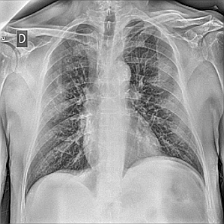

In [ ]:
#img=open_image("/content/C15SHARPCHNCXR_0574_1.png")
img=open_image("/content/C15SHARPCOVID-2365.png")
img.resize(224)

In [ ]:
pred=learn.predict(img)
cls=int(pred[1])
print(pred,cls)
print("Result: ")
if(cls==0):
  print("COVID-19")
elif(cls==1):
  print("Lung Opacity")
elif(cls==2):
  print("Normal")
elif(cls==3):
  print("Pneumonia")
else:
  print("Tuberculosis")
print(max(pred[2]*100))

(Category tensor(0), tensor(0), tensor([1.0000e+00, 4.5705e-10, 6.6819e-09, 1.7291e-08, 8.0099e-11])) 0
Result: 
COVID-19
tensor(100.)


In [ ]:
with hook_output(model[0]) as hook_a:
  with hook_output(model[0],grad=True) as hook_g:
    preds=model(b)
    preds[0,cls].backward()
acts=hook_a.stored[0].cpu()
grad=hook_g.stored[0][0].cpu()

NameError: ignored

In [ ]:
grad_chan=grad.mean(1).mean(1)
mult=((acts*grad_chan[..., None, None])).sum(0)

NameError: ignored

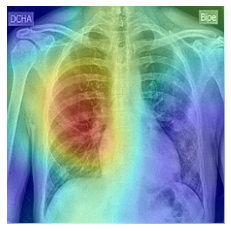

In [ ]:
_, ax=plt.subplots()
img.show(ax)
ax.imshow(mult, alpha=0.4, extent=(0,224,224,0), interpolation='bicubic', cmap="jet")

In [ ]:
#/content/C15SHARPCOVID-2431.png
#/content/C15SHARPCOVID-3278.png

img=open_image("/content/C15SHARPCOVID-2244.png")

img.resize(224)
gcam = GradCam.from_one_img(learn,img)

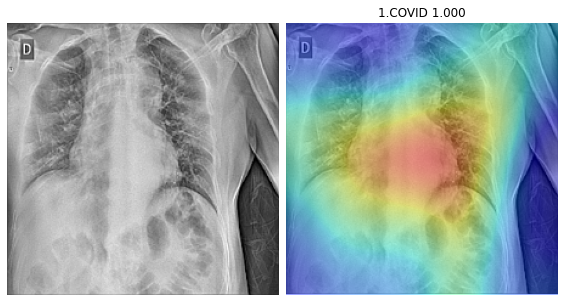

In [ ]:
gcam.plot(plot_gbp = False)

In [ ]:
gcam_heatmap = gcam.hmap1
#gcam_heatmap=mult

In [ ]:
from BBOXES_from_GRADCAM import BBoxerwGradCAM

ModuleNotFoundError: ignored

In [ ]:
image_resizing_scale = [224,224]
bbox_scaling = [1,1,1,1] 
#/content/C15SHARPCOVID-3278.png
bbox = BBoxerwGradCAM(learn,
                      gcam_heatmap,
                      "/content/C15SHARPCOVID-2244.png",
                      image_resizing_scale,
                      bbox_scaling)

In [ ]:
for function in dir(bbox)[-18:]: print(function)

bbox_coords
contours
form_bboxes
get_bboxes
grey_img
heatmap
heatmap_smoothing
image_path
learner
og_img
poly_coords
resize_list
scale_list
show_bboxpolygon
show_bboxrectangle
show_contouredheatmap
show_smoothheatmap
smooth_heatmap


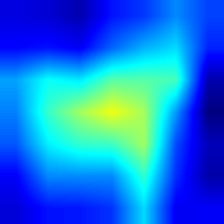

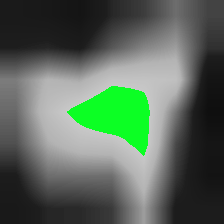

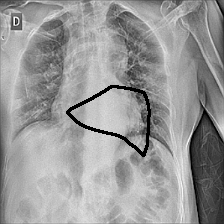

In [ ]:
bbox.show_smoothheatmap()
bbox.show_contouredheatmap()
#bbox.show_bboxrectangle()
bbox.show_bboxpolygon()

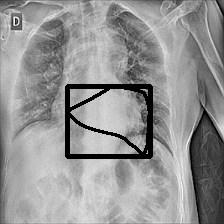

In [ ]:
bbox.show_bboxrectangle()

In [ ]:
rect_coords, polygon_coords = bbox.get_bboxes()

In [ ]:
rect_coords # x,y,w,h

[67, 86, 83, 70]

In [ ]:
polygon_coords

[array([[[111,  86]],
 
        [[110,  87]],
 
        [[109,  87]],
 
        [[107,  89]],
 
        ...,
 
        [[125,  88]],
 
        [[124,  87]],
 
        [[118,  87]],
 
        [[117,  86]]], dtype=int32)]

In [ ]:
# IoU for object detection
def get_IoU(truth_coords, pred_coords):
    pred_area = pred_coords[2]*pred_coords[3]
    truth_area = truth_coords[2]*truth_coords[3]
    # coords of intersection rectangle
    x1 = max(truth_coords[0], pred_coords[0])
    y1 = max(truth_coords[1], pred_coords[1])
    x2 = min(truth_coords[2], pred_coords[2])
    y2 = min(truth_coords[3], pred_coords[3])
    # area of intersection rectangle
    interArea = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    # area of prediction and truth rectangles
    boxTruthArea = (truth_coords[2] - truth_coords[0] + 1) * (truth_coords[3] - truth_coords[1] + 1)
    boxPredArea = (pred_coords[2] - pred_coords[0] + 1) * (pred_coords[3] - pred_coords[1] + 1)
    # intersection over union 
    iou = interArea / float(boxTruthArea + boxPredArea - interArea)
    return iou

In [ ]:
get_IoU([67, 86, 33, 10],rect_coords)

0.0

In [ ]:
import scipy.ndimage
#@title GradCAM Class

class GradCam():
    @classmethod
    def from_interp(cls,learn,interp,img_idx,ds_type=DatasetType.Valid,include_label=False):
        # produce heatmap and xb_grad for pred label (and actual label if include_label is True)
        if ds_type == DatasetType.Valid:
            ds = interp.data.valid_ds
        elif ds_type == DatasetType.Test:
            ds = interp.data.test_ds
            include_label=False
        else:
            return None
        
        x_img = ds.x[img_idx]
        xb,_ = interp.data.one_item(x_img)
        #xb_img = Image(interp.data.denorm(xb)[0])
        probs = interp.preds[img_idx].numpy()

        pred_idx = interp.pred_class[img_idx].item() # get class idx of img prediction label
        hmap_pred,xb_grad_pred = get_grad_heatmap(learn,xb,pred_idx,size=xb_img.shape[-1])
        prob_pred = probs[pred_idx]
        
        actual_args=None
        if include_label:
            actual_idx = ds.y.items[img_idx] # get class idx of img actual label
            if actual_idx!=pred_idx:
                hmap_actual,xb_grad_actual = get_grad_heatmap(learn,xb,actual_idx,size=xb_img.shape[-1])
                prob_actual = probs[actual_idx]
                actual_args=[interp.data.classes[actual_idx],prob_actual,hmap_actual,xb_grad_actual]
        
        return cls(x_img,interp.data.classes[pred_idx],prob_pred,hmap_pred,xb_grad_pred,actual_args)
    
    @classmethod
    def from_one_img(cls,learn,x_img,label1=None,label2=None):
        '''
        learn: fastai's Learner
        x_img: fastai.vision.image.Image
        label1: generate heatmap according to this label. If None, this wil be the label with highest probability from the model
        label2: generate additional heatmap according to this label
        '''
        pred_class,pred_idx,probs = learn.predict(x_img)
        label1= str(pred_class) if not label1 else label1
        
        xb,_ = learn.data.one_item(x_img)
        #xb_img = Image(learn.data.denorm(xb)[0])
        probs = probs.numpy()
        
        label1_idx = learn.data.classes.index(label1)
        hmap1,xb_grad1 = get_grad_heatmap(learn,xb,label1_idx,size=x_img.shape[-1])
        prob1 = probs[label1_idx]
        
        label2_args = None
        if label2:
            label2_idx = learn.data.classes.index(label2)
            hmap2,xb_grad2 = get_grad_heatmap(learn,xb,label2_idx,size=xb_img.shape[-1])
            prob2 = probs[label2_idx]
            label2_args = [label2,prob2,hmap2,xb_grad2]
            
        return cls(x_img,label1,prob1,hmap1,xb_grad1,label2_args)
    
    def __init__(self,x_img,label1,prob1,hmap1,xb_grad1,label2_args=None):
        self.x_img=x_img
        self.label1,self.prob1,self.hmap1,self.xb_grad1 = label1,prob1,hmap1,xb_grad1
        if label2_args:
            self.label2,self.prob2,self.hmap2,self.xb_grad2 = label2_args
            
    def plot(self,plot_hm=True,plot_gbp=True):
        if not plot_hm and not plot_gbp:
            plot_hm=True
        cols = 5 if hasattr(self, 'label2') else 3
        if not plot_gbp or not plot_hm:
            cols-= 2 if hasattr(self, 'label2') else 1

        fig,row_axes = plt.subplots(1,cols,figsize=(cols*5,5))  
        col=0
        size=self.x_img.shape[-1]
        self.x_img.show(row_axes[col]);col+=1
        
        label1_title = f'1.{self.label1} {self.prob1:.3f}'
        if plot_hm:
            show_heatmap(self.hmap1,self.x_img,size,row_axes[col])
            row_axes[col].set_title(label1_title);col+=1
        if plot_gbp:
            row_axes[col].imshow(self.xb_grad1)
            row_axes[col].set_axis_off()
            row_axes[col].set_title(label1_title);col+=1
        
        if hasattr(self, 'label2'):
            label2_title = f'2.{self.label2} {self.prob2:.3f}'
            if plot_hm:
                show_heatmap(self.hmap2,self.x_img,size,row_axes[col])
                row_axes[col].set_title(label2_title);col+=1
            if plot_gbp:
                row_axes[col].imshow(self.xb_grad2)
                row_axes[col].set_axis_off()
                row_axes[col].set_title(label2_title)
        # plt.tight_layout()
        fig.subplots_adjust(wspace=0, hspace=0)
        # fig.savefig('data_draw/both/gradcam.png')

def minmax_norm(x):
    return (x - np.min(x))/(np.max(x) - np.min(x))
def scaleup(x,size):
    scale_mult=size/x.shape[0]
    upsampled = scipy.ndimage.zoom(x, scale_mult)
    return upsampled

# hook for Gradcam
def hooked_backward(m,xb,target_layer,clas):
    with hook_output(target_layer) as hook_a: #hook at last layer of group 0's output (after bn, size 512x7x7 if resnet34)
        with hook_output(target_layer, grad=True) as hook_g: # gradient w.r.t to the target_layer
            preds = m(xb)
            preds[0,int(clas)].backward() # same as onehot backprop
    return hook_a,hook_g

def clamp_gradients_hook(module, grad_in, grad_out):
    for grad in grad_in:
        torch.clamp_(grad, min=0.0)
        
# hook for guided backprop
def hooked_ReLU(m,xb,clas):
    relu_modules = [module[1] for module in m.named_modules() if str(module[1]) == "ReLU(inplace)"]
    with callbacks.Hooks(relu_modules, clamp_gradients_hook, is_forward=False) as _:
        preds = m(xb)
        preds[0,int(clas)].backward()
        
def guided_backprop(learn,xb,y):
    xb = xb.cuda()
    m = learn.model.eval();
    xb.requires_grad_();
    if not xb.grad is None:
        xb.grad.zero_(); 
    hooked_ReLU(m,xb,y);
    return xb.grad[0].cpu().numpy()

def show_heatmap(hm,xb_im,size,ax=None):
    if ax is None:
        _,ax = plt.subplots()
    xb_im.show(ax)
    ax.imshow(hm, alpha=0.4, extent=(0,size,size,0),
              interpolation='bicubic',cmap='jet');

def get_grad_heatmap(learn,xb,y,size):
    '''
    Main function to get hmap for heatmap and xb_grad for guided backprop
    '''
    xb = xb.cuda()
    m = learn.model.eval();
    target_layer = m[0][-1][-1] # last layer of group 0
    hook_a,hook_g = hooked_backward(m,xb,target_layer,y)
    
    target_act= hook_a.stored[0].cpu().numpy()
    target_grad = hook_g.stored[0][0].cpu().numpy()
    
    mean_grad = target_grad.mean(1).mean(1)
#     hmap = (target_act*mean_grad[...,None,None]).mean(0)
    hmap = (target_act*mean_grad[...,None,None]).sum(0)
    hmap = np.where(hmap >= 0, hmap, 0)
    
    xb_grad = guided_backprop(learn,xb,y) # (3,224,224)        
    #minmax norm the grad
    xb_grad = minmax_norm(xb_grad)
    hmap_scaleup = minmax_norm(scaleup(hmap,size)) # (224,224)
    
    # multiply xb_grad and hmap_scaleup and switch axis
    xb_grad = np.einsum('ijk, jk->jki',xb_grad, hmap_scaleup) #(224,224,3)
    
    return hmap,xb_grad

In [ ]:
import cv2
try:
    import google.colab
    from google.colab.patches import cv2_imshow
except:
    from cv2 import imshow as cv2_imshow
import matplotlib.pyplot as plt
import os
import numpy as np

class BBoxerwGradCAM():
    
    def __init__(self,learner,heatmap,image_path,resize_scale_list,bbox_scale_list):
        self.learner = learner
        self.heatmap = heatmap
        self.image_path = image_path
        self.resize_list = resize_scale_list
        self.scale_list = bbox_scale_list
        
        #self.og_img, self.smooth_heatmap = self.heatmap_smoothing()
        
        self.bbox_coords, self.poly_coords, self.grey_img, self.contours = self.form_bboxes()
        
    def heatmap_smoothing(self):
        og_img = cv2.imread(self.image_path)
        heatmap = cv2.resize(self.heatmap, (self.resize_list[0],self.resize_list[1])) # Resizing
        og_img = cv2.resize(og_img, (self.resize_list[0],self.resize_list[1])) # Resizing
        '''
        The minimum pixel value will be mapped to the minimum output value (alpha - 0)
        The maximum pixel value will be mapped to the maximum output value (beta - 155)
        Linear scaling is applied to everything in between.
        These values were chosen with trial and error using COLORMAP_JET to deliver the best pixel saturation for forming contours.
        '''
        heatmapshow = cv2.normalize(heatmap, None, alpha=0, beta=155, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        heatmapshow = cv2.applyColorMap(heatmapshow, cv2.COLORMAP_JET)
        
        return og_img, heatmapshow
    
    def show_smoothheatmap(self):
        cv2_imshow(self.smooth_heatmap)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
    def show_bboxrectangle(self):
        cv2.rectangle(self.og_img,
                      (self.bbox_coords[0],self.bbox_coords[1]),
                      (self.bbox_coords[0]+self.bbox_coords[2],self.bbox_coords[1]+self.bbox_coords[3]),
                      (0,0,0),3)
        cv2_imshow(self.og_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    def show_contouredheatmap(self):
        img_col = cv2.merge([self.grey_img,self.grey_img,self.grey_img]) # merge channels to create color image (3 channels)
        cv2.fillPoly(img_col, self.contours, [36,255,12]) # fill contours on 3 channel image
        cv2_imshow(img_col)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
    def show_bboxpolygon(self):
        cv2.polylines(self.og_img,self.poly_coords,True,(0,0,0),2)
        cv2_imshow(self.og_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    def form_bboxes(self):
        #grey_img = cv2.cvtColor(self.smooth_heatmap, cv2.COLOR_BGR2GRAY)
        grey_img = cv2.cvtColor(self.image_path, cv2.COLOR_BGR2GRAY)
        ret,thresh = cv2.threshold(grey_img,224,224,cv2.THRESH_BINARY)
        contours,hierarchy = cv2.findContours(thresh, 1, 2)

        for item in range(len(contours)):
            cnt = contours[item]
            if len(cnt)>20:
                #print(len(cnt))
                x,y,w,h = cv2.boundingRect(cnt) # x, y is the top left corner, and w, h are the width and height respectively
                poly_coords = [cnt] # polygon coordinates are based on contours
                
                x = int(x*self.scale_list[0]) # rescaling the boundary box based on user input
                y = int(y*self.scale_list[1])
                w = int(w*self.scale_list[2])
                h = int(h*self.scale_list[3])

                return [x,y,w,h], poly_coords, grey_img, contours
            
            else: print("contour error (too small)")
                
    def get_bboxes(self):
        return self.bbox_coords, self.poly_coords

#FULL CODE

Mounted at /content/drive
Result: 
Lung Opacity
tensor(99.9712)


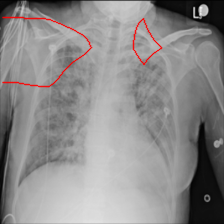

'\nrect_coords, polygon_coords = bbox.get_bboxes()\nrect_coords # x,y,w,h\npolygon_coords\n# IoU for object detection\ndef get_IoU(truth_coords, pred_coords):\n    pred_area = pred_coords[2]*pred_coords[3]\n    truth_area = truth_coords[2]*truth_coords[3]\n    # coords of intersection rectangle\n    x1 = max(truth_coords[0], pred_coords[0])\n    y1 = max(truth_coords[1], pred_coords[1])\n    x2 = min(truth_coords[2], pred_coords[2])\n    y2 = min(truth_coords[3], pred_coords[3])\n    # area of intersection rectangle\n    interArea = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)\n    # area of prediction and truth rectangles\n    boxTruthArea = (truth_coords[2] - truth_coords[0] + 1) * (truth_coords[3] - truth_coords[1] + 1)\n    boxPredArea = (pred_coords[2] - pred_coords[0] + 1) * (pred_coords[3] - pred_coords[1] + 1)\n    # intersection over union \n    iou = interArea / float(boxTruthArea + boxPredArea - interArea)\n    return iou\nget_IoU([101, 99, 200, 120],rect_coords)\n'

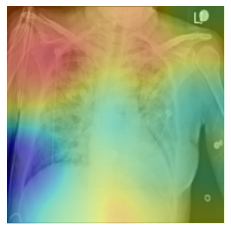

In [ ]:
import fastai; fastai.__version__
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import warnings
from fastai.callbacks.hooks import *

warnings.filterwarnings('ignore')

#CODINGBASU  
from google.colab import drive
drive.mount('/content/drive')
#learn=load_learner("..")
#Preprocessed 5class Model load
learn=load_learner("/content/drive/MyDrive/5classpreprocessedmodelfastai")
#Normal 5class Model load
learn=load_learner("/content/drive/MyDrive/5class")

model=learn.model.eval()

#bounding box code -----------------------
import cv2
try:
    import google.colab
    from google.colab.patches import cv2_imshow
except:
    from cv2 import imshow as cv2_imshow
import matplotlib.pyplot as plt
import os
import numpy as np

class BBoxerwGradCAM():
    
    def __init__(self,learner,heatmap,image_path,resize_scale_list,bbox_scale_list):
        self.learner = learner
        self.heatmap = heatmap
        self.image_path = image_path
        self.resize_list = resize_scale_list
        self.scale_list = bbox_scale_list
        
        self.og_img, self.smooth_heatmap = self.heatmap_smoothing()
        
        self.bbox_coords, self.poly_coords, self.grey_img, self.contours = self.form_bboxes()
        
    def heatmap_smoothing(self):
        og_img = cv2.imread(self.image_path)
        heatmap = cv2.resize(self.heatmap, (self.resize_list[0],self.resize_list[1])) # Resizing
        og_img = cv2.resize(og_img, (self.resize_list[0],self.resize_list[1])) # Resizing
        '''
        The minimum pixel value will be mapped to the minimum output value (alpha - 0)
        The maximum pixel value will be mapped to the maximum output value (beta - 155)
        Linear scaling is applied to everything in between.
        These values were chosen with trial and error using COLORMAP_JET to deliver the best pixel saturation for forming contours.
        '''
        heatmapshow = cv2.normalize(heatmap, None, alpha=0, beta=155, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        heatmapshow = cv2.applyColorMap(heatmapshow, cv2.COLORMAP_JET)
        
        return og_img, heatmapshow
    
    def show_smoothheatmap(self):
        '''cv2_imshow(self.smooth_heatmap)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        '''
    '''def show_bboxrectangle(self):
        cv2.rectangle(self.og_img,
                      (self.bbox_coords[0],self.bbox_coords[1]),
                      (self.bbox_coords[0]+self.bbox_coords[2],self.bbox_coords[1]+self.bbox_coords[3]),
                      (0,0,0),3)
        cv2_imshow(self.og_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    def show_contouredheatmap(self):
        img_col = cv2.merge([self.grey_img,self.grey_img,self.grey_img]) # merge channels to create color image (3 channels)
        cv2.fillPoly(img_col, self.contours, [0,0,255]) # fill contours on 3 channel image
        cv2_imshow(img_col)
        cv2.imwrite("contourheatmap.png",img_col)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
    def show_bboxpolygon(self):
        print(self.poly_coords)
        cv2.polylines(self.og_img,self.poly_coords,True,(0,0,0),2)
        cv2_imshow(self.og_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    '''
    def form_bboxes(self):
        grey_img = cv2.cvtColor(self.smooth_heatmap, cv2.COLOR_BGR2GRAY)
        ret,thresh = cv2.threshold(grey_img,200,255,cv2.THRESH_BINARY)
        '''cv2_imshow(thresh)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        cv2.imwrite("thresh.png",thresh)'''
        contours,hierarchy = cv2.findContours(thresh, 1, 2)
        cv2.drawContours(self.og_img, contours=contours, contourIdx=-1, color=(0, 0, 255), thickness=1, lineType=cv2.LINE_AA)
        cv2_imshow(self.og_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        for item in range(len(contours)):
            cnt = contours[item]
            if len(cnt)>20:
                #print(len(cnt))
                x,y,w,h = cv2.boundingRect(cnt) # x, y is the top left corner, and w, h are the width and height respectively
                poly_coords = [cnt] # polygon coordinates are based on contours
                
                x = int(x*self.scale_list[0]) # rescaling the boundary box based on user input
                y = int(y*self.scale_list[1])
                w = int(w*self.scale_list[2])
                h = int(h*self.scale_list[3])

                return [x,y,w,h], poly_coords, grey_img, contours
            
            else: print("contour error (too small)")
                
    def get_bboxes(self):
        return self.bbox_coords, self.poly_coords

#gradcam code----------------------
import scipy.ndimage

class GradCam():
    @classmethod
    def from_interp(cls,learn,interp,img_idx,ds_type=DatasetType.Valid,include_label=False):
        # produce heatmap and xb_grad for pred label (and actual label if include_label is True)
        if ds_type == DatasetType.Valid:
            ds = interp.data.valid_ds
        elif ds_type == DatasetType.Test:
            ds = interp.data.test_ds
            include_label=False
        else:
            return None
        
        x_img = ds.x[img_idx]
        xb,_ = interp.data.one_item(x_img)
        #xb_img = Image(interp.data.denorm(xb)[0])
        probs = interp.preds[img_idx].numpy()

        pred_idx = interp.pred_class[img_idx].item() # get class idx of img prediction label
        hmap_pred,xb_grad_pred = get_grad_heatmap(learn,xb,pred_idx,size=xb_img.shape[-1])
        prob_pred = probs[pred_idx]
        
        actual_args=None
        if include_label:
            actual_idx = ds.y.items[img_idx] # get class idx of img actual label
            if actual_idx!=pred_idx:
                hmap_actual,xb_grad_actual = get_grad_heatmap(learn,xb,actual_idx,size=xb_img.shape[-1])
                prob_actual = probs[actual_idx]
                actual_args=[interp.data.classes[actual_idx],prob_actual,hmap_actual,xb_grad_actual]
        
        return cls(x_img,interp.data.classes[pred_idx],prob_pred,hmap_pred,xb_grad_pred,actual_args)
    
    @classmethod
    def from_one_img(cls,learn,x_img,label1=None,label2=None):
        '''
        learn: fastai's Learner
        x_img: fastai.vision.image.Image
        label1: generate heatmap according to this label. If None, this wil be the label with highest probability from the model
        label2: generate additional heatmap according to this label
        '''
        pred_class,pred_idx,probs = learn.predict(x_img)
        label1= str(pred_class) if not label1 else label1
        
        xb,_ = learn.data.one_item(x_img)
        #xb_img = Image(learn.data.denorm(xb)[0])
        probs = probs.numpy()
        
        label1_idx = learn.data.classes.index(label1)
        hmap1,xb_grad1 = get_grad_heatmap(learn,xb,label1_idx,size=x_img.shape[-1])
        prob1 = probs[label1_idx]
        
        label2_args = None
        if label2:
            label2_idx = learn.data.classes.index(label2)
            hmap2,xb_grad2 = get_grad_heatmap(learn,xb,label2_idx,size=xb_img.shape[-1])
            prob2 = probs[label2_idx]
            label2_args = [label2,prob2,hmap2,xb_grad2]
            
        return cls(x_img,label1,prob1,hmap1,xb_grad1,label2_args)
    
    def __init__(self,x_img,label1,prob1,hmap1,xb_grad1,label2_args=None):
        self.x_img=x_img
        self.label1,self.prob1,self.hmap1,self.xb_grad1 = label1,prob1,hmap1,xb_grad1
        if label2_args:
            self.label2,self.prob2,self.hmap2,self.xb_grad2 = label2_args
            
'''    def plot(self,plot_hm=True,plot_gbp=True):
        if not plot_hm and not plot_gbp:
            plot_hm=True
        cols = 5 if hasattr(self, 'label2') else 3
        if not plot_gbp or not plot_hm:
            cols-= 2 if hasattr(self, 'label2') else 1

        fig,row_axes = plt.subplots(1,cols,figsize=(cols*5,5))  
        col=0
        size=self.x_img.shape[-1]
        self.x_img.show(row_axes[col]);col+=1
        
        label1_title = f'1.{self.label1} {self.prob1:.3f}'
        if plot_hm:
            #show_heatmap(self.hmap1,self.x_img,size,row_axes[col])
            row_axes[col].set_title(label1_title);col+=1
        if plot_gbp:
            #row_axes[col].imshow(self.xb_grad1)
            row_axes[col].set_axis_off()
            row_axes[col].set_title(label1_title);col+=1
        
        if hasattr(self, 'label2'):
            label2_title = f'2.{self.label2} {self.prob2:.3f}'
            if plot_hm:
                show_heatmap(self.hmap2,self.x_img,size,row_axes[col])
                row_axes[col].set_title(label2_title);col+=1
            if plot_gbp:
                #row_axes[col].imshow(self.xb_grad2)
                row_axes[col].set_axis_off()
                #row_axes[col].set_title(label2_title)
        # plt.tight_layout()
        fig.subplots_adjust(wspace=0, hspace=0)
        fig.savefig('hey.png')
'''
def minmax_norm(x):
    return (x - np.min(x))/(np.max(x) - np.min(x))
def scaleup(x,size):
    scale_mult=size/x.shape[0]
    upsampled = scipy.ndimage.zoom(x, scale_mult)
    return upsampled

# hook for Gradcam
def hooked_backward(m,xb,target_layer,clas):
    with hook_output(target_layer) as hook_a: #hook at last layer of group 0's output (after bn, size 512x7x7 if resnet34)
        with hook_output(target_layer, grad=True) as hook_g: # gradient w.r.t to the target_layer
            preds = m(xb)
            preds[0,int(clas)].backward() # same as onehot backprop
    return hook_a,hook_g

def clamp_gradients_hook(module, grad_in, grad_out):
    for grad in grad_in:
        torch.clamp_(grad, min=0.0)
        
# hook for guided backprop
def hooked_ReLU(m,xb,clas):
    relu_modules = [module[1] for module in m.named_modules() if str(module[1]) == "ReLU(inplace)"]
    with callbacks.Hooks(relu_modules, clamp_gradients_hook, is_forward=False) as _:
        preds = m(xb)
        preds[0,int(clas)].backward()
        
def guided_backprop(learn,xb,y):
    xb = xb.cuda()
    m = learn.model.eval();
    xb.requires_grad_();
    if not xb.grad is None:
        xb.grad.zero_(); 
    hooked_ReLU(m,xb,y);
    return xb.grad[0].cpu().numpy()

'''def show_heatmap(hm,xb_im,size,ax=None):
    if ax is None:
        _,ax = plt.subplots()
    #xb_im.show(ax)
    #ax.imshow(hm, alpha=0.4, extent=(0,size,size,0),interpolation='bicubic',cmap='jet');
'''
def get_grad_heatmap(learn,xb,y,size):
    '''
    Main function to get hmap for heatmap and xb_grad for guided backprop
    '''
    xb = xb.cuda()
    m = learn.model.eval();
    #here
    pred=learn.predict(img)
    cls=int(pred[1])
    print("Result: ")
    if(cls==0):
      print("COVID-19")
    elif(cls==1):
      print("Lung Opacity")
    elif(cls==2):
      print("Normal")
    elif(cls==3):
      print("Pneumonia")
    else:
      print("Tuberculosis")
    print(max(pred[2]*100))
    b, _ =learn.data.one_item(img,denorm=False)
    #b = Image(data.one_item(img,denorm=True))
    #b=b.cuda()
    with hook_output(model[0]) as hook_a:
      with hook_output(model[0],grad=True) as hook_g:
        preds=model(b)
        preds[0,cls].backward()
    acts=hook_a.stored[0].cpu()
    grad=hook_g.stored[0][0].cpu()

    grad_chan=grad.mean(1).mean(1)
    hmap=((acts*grad_chan[..., None, None])).sum(0)
    _, ax=plt.subplots()
    img.show(ax)
    ax.imshow(hmap, alpha=0.4, extent=(0,224,224,0), interpolation='bicubic', cmap='jet')
    hmap = np.where(hmap >= 0, hmap, 0)
    #upto here
#     target_layer = m[0][-1][-1] # last layer of group 0
#     hook_a,hook_g = hooked_backward(m,xb,target_layer,y)
    
#     target_act= hook_a.stored[0].cpu().numpy()
#     target_grad = hook_g.stored[0][0].cpu().numpy()
    
#     mean_grad = target_grad.mean(1).mean(1)
# #     hmap = (target_act*mean_grad[...,None,None]).mean(0)
#     hmap = (target_act*mean_grad[...,None,None]).sum(0)
#     hmap = np.where(hmap >= 0, hmap, 0)
    
    xb_grad = guided_backprop(learn,xb,y) # (3,224,224)        
    #minmax norm the grad
    xb_grad = minmax_norm(xb_grad)
    hmap_scaleup = minmax_norm(scaleup(hmap,size)) # (224,224)
    
    # multiply xb_grad and hmap_scaleup and switch axis
    xb_grad = np.einsum('ijk, jk->jki',xb_grad, hmap_scaleup) #(224,224,3)
    
    return hmap,xb_grad

#/content/C15SHARPCOVID-2244.png
#/content/C15SHARPViral Pneumonia-7.png
#/content/C15SHARPViral Pneumonia-987.png
#/content/C15SHARPCOVID-2407.png
#/content/C15SHARPNormal-3.png

#/content/COVID-2671.png
#


filepath="/content/Lung_Opacity-3320.png"
img=open_image(filepath)

img.resize(224)
gcam = GradCam.from_one_img(learn,img)
#gcam.plot(plot_gbp = False)
gcam_heatmap = gcam.hmap1
#gcam_heatmap=mult
image_resizing_scale = [224,224]
bbox_scaling = [1,1,1,1] 
#/content/C15SHARPCOVID-3278.png
bbox = BBoxerwGradCAM(learn,
                      gcam_heatmap,
                      filepath,
                      image_resizing_scale,
                      bbox_scaling)
#for function in dir(bbox)[-18:]: print(function)
'''
bbox.show_smoothheatmap()
bbox.show_contouredheatmap()
#bbox.show_bboxrectangle()
bbox.show_bboxpolygon()
bbox.show_bboxrectangle()
'''
# if needed
'''
rect_coords, polygon_coords = bbox.get_bboxes()
rect_coords # x,y,w,h
polygon_coords
# IoU for object detection
def get_IoU(truth_coords, pred_coords):
    pred_area = pred_coords[2]*pred_coords[3]
    truth_area = truth_coords[2]*truth_coords[3]
    # coords of intersection rectangle
    x1 = max(truth_coords[0], pred_coords[0])
    y1 = max(truth_coords[1], pred_coords[1])
    x2 = min(truth_coords[2], pred_coords[2])
    y2 = min(truth_coords[3], pred_coords[3])
    # area of intersection rectangle
    interArea = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    # area of prediction and truth rectangles
    boxTruthArea = (truth_coords[2] - truth_coords[0] + 1) * (truth_coords[3] - truth_coords[1] + 1)
    boxPredArea = (pred_coords[2] - pred_coords[0] + 1) * (pred_coords[3] - pred_coords[1] + 1)
    # intersection over union 
    iou = interArea / float(boxTruthArea + boxPredArea - interArea)
    return iou
get_IoU([101, 99, 200, 120],rect_coords)
'''

#FINAL CODE

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


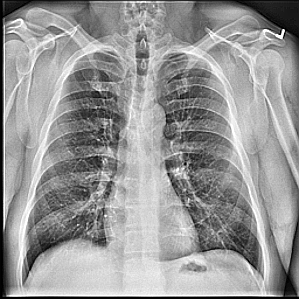

Result: 
Normal
tensor(92.8529)


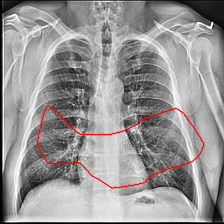

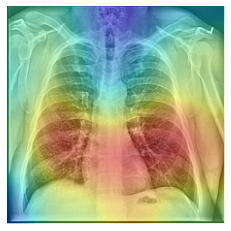

In [ ]:
import fastai; fastai.__version__
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import warnings
from fastai.callbacks.hooks import *

warnings.filterwarnings('ignore')

#CODINGBASU  
from google.colab import drive
drive.mount('/content/drive')
#Preprocessed 5class Model load
learn=load_learner("/content/drive/MyDrive/5classpreprocessedmodelfastai")
#Normal 5class Model load
#learn=load_learner("/content/drive/MyDrive/5class")

model=learn.model.eval()

#bounding box code -----------------------
import cv2
try:
    import google.colab
    from google.colab.patches import cv2_imshow
except:
    from cv2 import imshow as cv2_imshow
import matplotlib.pyplot as plt
import os
import numpy as np

class BBoxerwGradCAM():
    
    def __init__(self,learner,heatmap,image_path,resize_scale_list,bbox_scale_list):
        self.learner = learner
        self.heatmap = heatmap
        self.image_path = image_path
        self.resize_list = resize_scale_list
        self.scale_list = bbox_scale_list
        
        self.og_img, self.smooth_heatmap = self.heatmap_smoothing()
        
        self.bbox_coords, self.poly_coords, self.grey_img, self.contours = self.form_bboxes()
        
    def heatmap_smoothing(self):
        og_img = cv2.imread(self.image_path)
        heatmap = cv2.resize(self.heatmap, (self.resize_list[0],self.resize_list[1])) # Resizing
        og_img = cv2.resize(og_img, (self.resize_list[0],self.resize_list[1])) # Resizing
        '''
        The minimum pixel value will be mapped to the minimum output value (alpha - 0)
        The maximum pixel value will be mapped to the maximum output value (beta - 155)
        Linear scaling is applied to everything in between.
        These values were chosen with trial and error using COLORMAP_JET to deliver the best pixel saturation for forming contours.
        '''
        heatmapshow = cv2.normalize(heatmap, None, alpha=0, beta=155, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        heatmapshow = cv2.applyColorMap(heatmapshow, cv2.COLORMAP_JET)
        
        return og_img, heatmapshow
    
    def form_bboxes(self):
        grey_img = cv2.cvtColor(self.smooth_heatmap, cv2.COLOR_BGR2GRAY)
        ret,thresh = cv2.threshold(grey_img,200,255,cv2.THRESH_BINARY)
        contours,hierarchy = cv2.findContours(thresh, 1, 2)
        cv2.drawContours(self.og_img, contours=contours, contourIdx=-1, color=(0, 0, 255), thickness=1, lineType=cv2.LINE_AA)
        cv2_imshow(self.og_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        for item in range(len(contours)):
            cnt = contours[item]
            if len(cnt)>20:
                #print(len(cnt))
                x,y,w,h = cv2.boundingRect(cnt) # x, y is the top left corner, and w, h are the width and height respectively
                poly_coords = [cnt] # polygon coordinates are based on contours
                
                x = int(x*self.scale_list[0]) # rescaling the boundary box based on user input
                y = int(y*self.scale_list[1])
                w = int(w*self.scale_list[2])
                h = int(h*self.scale_list[3])

                return [x,y,w,h], poly_coords, grey_img, contours
            
            else: print("contour error (too small)")
                
    def get_bboxes(self):
        return self.bbox_coords, self.poly_coords

#gradcam code----------------------
import scipy.ndimage

class GradCam():
    @classmethod
    def from_interp(cls,learn,interp,img_idx,ds_type=DatasetType.Valid,include_label=False):
        # produce heatmap and xb_grad for pred label (and actual label if include_label is True)
        if ds_type == DatasetType.Valid:
            ds = interp.data.valid_ds
        elif ds_type == DatasetType.Test:
            ds = interp.data.test_ds
            include_label=False
        else:
            return None
        
        x_img = ds.x[img_idx]
        xb,_ = interp.data.one_item(x_img)
        #xb_img = Image(interp.data.denorm(xb)[0])
        probs = interp.preds[img_idx].numpy()

        pred_idx = interp.pred_class[img_idx].item() # get class idx of img prediction label
        hmap_pred,xb_grad_pred = get_grad_heatmap(learn,xb,pred_idx,size=xb_img.shape[-1])
        prob_pred = probs[pred_idx]
        
        actual_args=None
        if include_label:
            actual_idx = ds.y.items[img_idx] # get class idx of img actual label
            if actual_idx!=pred_idx:
                hmap_actual,xb_grad_actual = get_grad_heatmap(learn,xb,actual_idx,size=xb_img.shape[-1])
                prob_actual = probs[actual_idx]
                actual_args=[interp.data.classes[actual_idx],prob_actual,hmap_actual,xb_grad_actual]
        
        return cls(x_img,interp.data.classes[pred_idx],prob_pred,hmap_pred,xb_grad_pred,actual_args)
    
    @classmethod
    def from_one_img(cls,learn,x_img,label1=None,label2=None):
        pred_class,pred_idx,probs = learn.predict(x_img)
        label1= str(pred_class) if not label1 else label1
        
        xb,_ = learn.data.one_item(x_img)
        #xb_img = Image(learn.data.denorm(xb)[0])
        probs = probs.numpy()
        
        label1_idx = learn.data.classes.index(label1)
        hmap1,xb_grad1 = get_grad_heatmap(learn,xb,label1_idx,size=x_img.shape[-1])
        prob1 = probs[label1_idx]
        
        label2_args = None
        if label2:
            label2_idx = learn.data.classes.index(label2)
            hmap2,xb_grad2 = get_grad_heatmap(learn,xb,label2_idx,size=xb_img.shape[-1])
            prob2 = probs[label2_idx]
            label2_args = [label2,prob2,hmap2,xb_grad2]
            
        return cls(x_img,label1,prob1,hmap1,xb_grad1,label2_args)
    
    def __init__(self,x_img,label1,prob1,hmap1,xb_grad1,label2_args=None):
        self.x_img=x_img
        self.label1,self.prob1,self.hmap1,self.xb_grad1 = label1,prob1,hmap1,xb_grad1
        if label2_args:
            self.label2,self.prob2,self.hmap2,self.xb_grad2 = label2_args

def minmax_norm(x):
    return (x - np.min(x))/(np.max(x) - np.min(x))
def scaleup(x,size):
    scale_mult=size/x.shape[0]
    upsampled = scipy.ndimage.zoom(x, scale_mult)
    return upsampled

# hook for Gradcam
def hooked_backward(m,xb,target_layer,clas):
    with hook_output(target_layer) as hook_a: #hook at last layer of group 0's output (after bn, size 512x7x7 if resnet34)
        with hook_output(target_layer, grad=True) as hook_g: # gradient w.r.t to the target_layer
            preds = m(xb)
            preds[0,int(clas)].backward() # same as onehot backprop
    return hook_a,hook_g

def clamp_gradients_hook(module, grad_in, grad_out):
    for grad in grad_in:
        torch.clamp_(grad, min=0.0)
        
# hook for guided backprop
def hooked_ReLU(m,xb,clas):
    relu_modules = [module[1] for module in m.named_modules() if str(module[1]) == "ReLU(inplace)"]
    with callbacks.Hooks(relu_modules, clamp_gradients_hook, is_forward=False) as _:
        preds = m(xb)
        preds[0,int(clas)].backward()
        
def guided_backprop(learn,xb,y):
    xb = xb.cuda()
    m = learn.model.eval();
    xb.requires_grad_();
    if not xb.grad is None:
        xb.grad.zero_(); 
    hooked_ReLU(m,xb,y);
    return xb.grad[0].cpu().numpy()

def get_grad_heatmap(learn,xb,y,size):
    '''
    Main function to get hmap for heatmap and xb_grad for guided backprop
    '''
    xb = xb.cuda()
    m = learn.model.eval();
    #here
    pred=learn.predict(img)
    cls=int(pred[1])
    print("Result: ")
    if(cls==0):
      print("COVID-19")
    elif(cls==1):
      print("Lung Opacity")
    elif(cls==2):
      print("Normal")
    elif(cls==3):
      print("Pneumonia")
    else:
      print("Tuberculosis")
    print(max(pred[2]*100))
    b, _ =learn.data.one_item(img,denorm=False)
    with hook_output(model[0]) as hook_a:
      with hook_output(model[0],grad=True) as hook_g:
        preds=model(b)
        preds[0,cls].backward()
    acts=hook_a.stored[0].cpu()
    grad=hook_g.stored[0][0].cpu()

    grad_chan=grad.mean(1).mean(1)
    hmap=((acts*grad_chan[..., None, None])).sum(0)
    _, ax=plt.subplots()
    img.show(ax)
    ax.imshow(hmap, alpha=0.4, extent=(0,224,224,0), interpolation='bicubic', cmap='jet')
    hmap = np.where(hmap >= 0, hmap, 0)
    #upto here    
    xb_grad = guided_backprop(learn,xb,y) # (3,224,224)        
    #minmax norm the grad
    xb_grad = minmax_norm(xb_grad)
    hmap_scaleup = minmax_norm(scaleup(hmap,size)) # (224,224) 
    # multiply xb_grad and hmap_scaleup and switch axis
    xb_grad = np.einsum('ijk, jk->jki',xb_grad, hmap_scaleup) #(224,224,3)
    
    return hmap,xb_grad

#/content/C15SHARPCOVID-2244.png
#/content/C15SHARPViral Pneumonia-7.png
#/content/C15SHARPViral Pneumonia-987.png
#/content/C15SHARPCOVID-2407.png
#/content/C15SHARPNormal-3.png
#/content/C15SHARPCOVID-3446.png
#/content/C15SHARPLung_Opacity-5757.png
#/content/C15SHARPCXR3904_IM-1983-1001.png                 #tb case
#/content/C15SHARPTuberculosis-374.png
#/content/C15SHARPNormal-18.png


#/content/COVID-2671.png
#


filepath="/content/C15SHARPNormal-18.png"
img=open_image(filepath)
cvimage = cv2.imread(filepath)
cv2_imshow(cvimage)
cv2.waitKey(0)
cv2.destroyAllWindows()
img.resize(224)
gcam = GradCam.from_one_img(learn,img)
#gcam.plot(plot_gbp = False)
gcam_heatmap = gcam.hmap1
#gcam_heatmap=mult
image_resizing_scale = [224,224]
bbox_scaling = [1,1,1,1] 
#/content/C15SHARPCOVID-3278.png
bbox = BBoxerwGradCAM(learn,
                      gcam_heatmap,
                      filepath,
                      image_resizing_scale,
                      bbox_scaling)